In [223]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import figure

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_rows',100)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

#  Retail Customer Segmentation

In [224]:
df = pd.read_csv('E-commerce.csv')

In [225]:
df['amount_spent'] = df['amount_spent'].round(decimals=2)
df['amount_discount'] = df['amount_discount'].round(decimals=2)

In [226]:
df

,ID,n_clicks,n_visits,amount_spent,amount_discount,days_since_registration,profile_information
0,1476,130,65,213.91,31.60,233,235
1,1535,543,46,639.22,5.69,228,170
2,1807,520,102,1157.40,844.32,247,409
3,1727,702,83,1195.90,850.04,148,200
4,1324,221,84,180.75,64.28,243,259
...,...,...,...,...,...,...,...
2495,1854,804,120,502.64,373.41,363,107
2496,1190,482,60,530.01,122.64,112,354
2497,1316,375,111,0.00,0.00,84,454
2498,32,271,32,3190.50,78.13,111,215


In [227]:
df.describe()

,ID,n_clicks,n_visits,amount_spent,amount_discount,days_since_registration,profile_information
count,2500.00000,2500.00000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000
mean,1249.50000,408.68000,94.475600,1445.090752,388.508604,200.973600,201.040400
std,721.83216,186.41409,38.866356,1167.663417,487.144003,99.136618,100.139213
min,0.00000,50.00000,10.000000,0.000000,0.000000,0.000000,0.000000
25%,624.75000,274.75000,67.000000,609.617500,56.300000,130.000000,132.000000
50%,1249.50000,378.00000,92.000000,1036.190000,137.455000,200.000000,201.000000
75%,1874.25000,522.00000,119.000000,1949.272500,679.542500,268.000000,270.000000
max,2499.00000,1246.00000,259.000000,6567.400000,2428.410000,514.000000,585.000000


In [228]:
df = df.drop(["ID","profile_information"],axis=1)

### Pre-processing : 

In [230]:
X = df
X


,n_clicks,n_visits,amount_spent,amount_discount,days_since_registration
0,130,65,213.91,31.60,233
1,543,46,639.22,5.69,228
2,520,102,1157.40,844.32,247
3,702,83,1195.90,850.04,148
4,221,84,180.75,64.28,243
...,...,...,...,...,...
2495,804,120,502.64,373.41,363
2496,482,60,530.01,122.64,112
2497,375,111,0.00,0.00,84
2498,271,32,3190.50,78.13,111


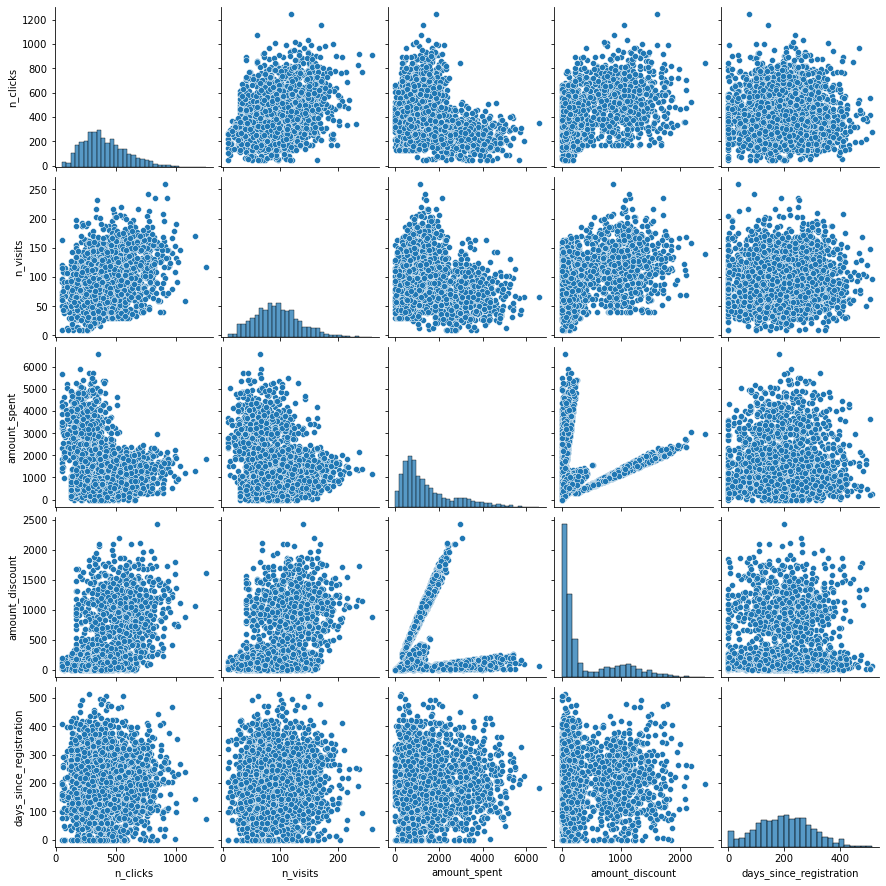

In [231]:
sns.pairplot(X)

In [232]:
X.columns

Index(['n_clicks', 'n_visits', 'amount_spent', 'amount_discount', 'days_since_registration'], dtype='object')

<AxesSubplot:xlabel='n_clicks', ylabel='amount_spent'>

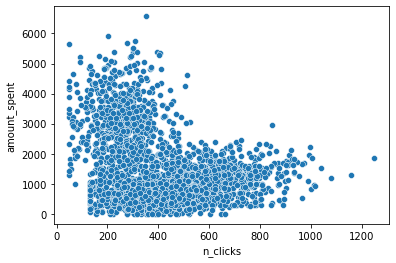

In [233]:
sns.scatterplot(X["n_clicks"],X["amount_spent"])

<AxesSubplot:xlabel='amount_discount', ylabel='amount_spent'>

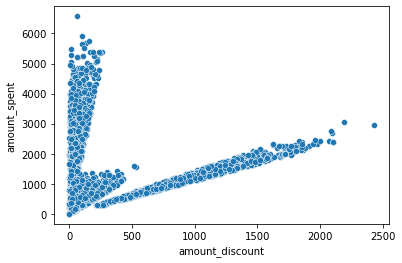

In [234]:
sns.scatterplot(X["amount_discount"],X["amount_spent"])

In [235]:
unscaled_data = X.copy()

In [236]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [237]:
scaler.fit(X)


StandardScaler()

In [238]:
X = scaler.transform(X)

In [239]:
X

array([[-1.49525046, -0.75853514, -1.0546079 , -0.73280181,  0.32311781],
       [ 0.72069055, -1.24748762, -0.69029479, -0.78600001,  0.27267227],
       [ 0.59728463,  0.19363547, -0.24643087,  0.93586821,  0.46436533],
       ...,
       [-0.18070918,  0.42524454, -1.23783946, -0.79768267, -1.18015931],
       [-0.73871854, -1.60776839,  1.49508703, -0.6372668 , -0.90775339],
       [ 2.17473416,  0.73405663, -0.04325806,  1.38982891,  0.47445444]])

In [240]:
from sklearn.cluster import KMeans
k = 4 
# from the visualization estimating total clusters can be 4 

kmeans = KMeans(n_clusters=k)
y_pred = kmeans.fit_predict(X)

In [241]:
y_pred

array([1, 1, 2, ..., 3, 0, 2])

In [242]:
kmeans.cluster_centers_


array([[-0.85178907, -0.69436955,  1.6270225 , -0.62732147, -0.04865343],
       [-0.19873618, -0.03556851, -0.61362807, -0.42699821,  0.90976331],
       [ 1.03881488,  0.879526  , -0.03038343,  1.5180507 , -0.01694353],
       [-0.09612138, -0.22193591, -0.63344723, -0.47841814, -0.77481119]])

### Visualize clusters

In [245]:
clusters = pd.DataFrame(X, columns=df.columns)
clusters['label'] = kmeans.labels_
clusters

,n_clicks,n_visits,amount_spent,amount_discount,days_since_registration,label
0,-1.495250,-0.758535,-1.054608,-0.732802,0.323118,1
1,0.720691,-1.247488,-0.690295,-0.786000,0.272672,1
2,0.597285,0.193635,-0.246431,0.935868,0.464365,2
3,1.573801,-0.295317,-0.213452,0.947612,-0.534456,2
4,-1.006992,-0.269583,-1.083012,-0.665704,0.424009,1
...,...,...,...,...,...,...
2495,2.121079,0.656854,-0.807287,-0.031000,1.634702,1
2496,0.393397,-0.887207,-0.783842,-0.545879,-0.897664,3
2497,-0.180709,0.425245,-1.237839,-0.797683,-1.180159,3
2498,-0.738719,-1.607768,1.495087,-0.637267,-0.907753,0


In [246]:
clusters

,n_clicks,n_visits,amount_spent,amount_discount,days_since_registration,label
0,-1.495250,-0.758535,-1.054608,-0.732802,0.323118,1
1,0.720691,-1.247488,-0.690295,-0.786000,0.272672,1
2,0.597285,0.193635,-0.246431,0.935868,0.464365,2
3,1.573801,-0.295317,-0.213452,0.947612,-0.534456,2
4,-1.006992,-0.269583,-1.083012,-0.665704,0.424009,1
...,...,...,...,...,...,...
2495,2.121079,0.656854,-0.807287,-0.031000,1.634702,1
2496,0.393397,-0.887207,-0.783842,-0.545879,-0.897664,3
2497,-0.180709,0.425245,-1.237839,-0.797683,-1.180159,3
2498,-0.738719,-1.607768,1.495087,-0.637267,-0.907753,0


In [247]:
import plotly.express as px

fig = px.scatter_3d(clusters,
                    x='n_clicks',
                    y='amount_spent', 
                    z='amount_discount',
                    color='label')
fig.update_traces(marker=dict(size=2,
                              line=dict(width=2,
                                        color='DarkSlateGrey')),
                  selector=dict(mode='markers'))
fig.show()

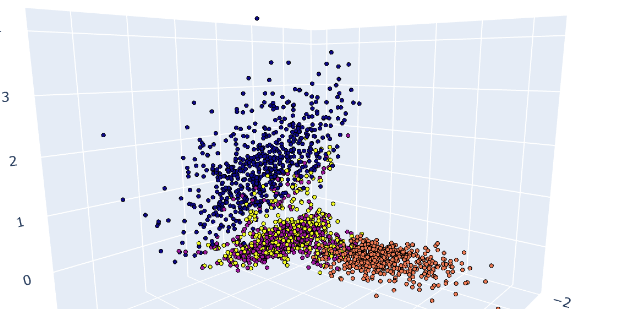

In [248]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np


<Figure size 1440x1440 with 0 Axes>

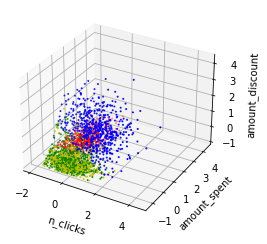

In [249]:
plt.figure(figsize=(20,20))
x=clusters['n_clicks']
y=clusters['amount_spent']
z=clusters['amount_discount']
labels = clusters["label"]

# Create a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
colors = {0: 'r', 1: 'g', 2: 'b', 3: "y"}
ax.scatter(x, y, z, c=[colors[label] for label in labels],s=1)

# Set axis labels
ax.set_xlabel('n_clicks')
ax.set_ylabel('amount_spent')
ax.set_zlabel('amount_discount')

plt.show()


In [250]:
def viz_clusters(kmeans):
    plt.scatter(clusters['n_clicks'], clusters['n_visits'], c=clusters['label'])
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
                color="red",
                marker="X",
                s=100)

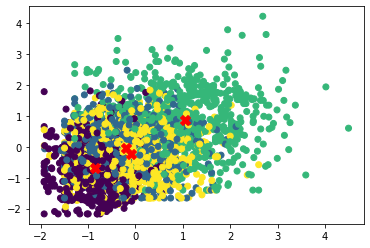

In [251]:
viz_clusters(kmeans)

In [252]:
clusters.groupby("label").mean()

,n_clicks,n_visits,amount_spent,amount_discount,days_since_registration
label,,,,,
0,-0.851789,-0.694370,1.627023,-0.627321,-0.048653
1,-0.198736,-0.035569,-0.613628,-0.426998,0.909763
2,1.038815,0.879526,-0.030383,1.518051,-0.016944
3,-0.096121,-0.221936,-0.633447,-0.478418,-0.774811


### polar plot for cluster visualization : 

In [253]:
polar = clusters.groupby("label").mean().reset_index()


In [254]:
polar

,label,n_clicks,n_visits,amount_spent,amount_discount,days_since_registration
0,0,-0.851789,-0.694370,1.627023,-0.627321,-0.048653
1,1,-0.198736,-0.035569,-0.613628,-0.426998,0.909763
2,2,1.038815,0.879526,-0.030383,1.518051,-0.016944
3,3,-0.096121,-0.221936,-0.633447,-0.478418,-0.774811


In [255]:
polar = pd.melt(polar, id_vars=["label"])
polar

,label,variable,value
0,0,n_clicks,-0.851789
1,1,n_clicks,-0.198736
2,2,n_clicks,1.038815
3,3,n_clicks,-0.096121
4,0,n_visits,-0.694370
5,1,n_visits,-0.035569
6,2,n_visits,0.879526
7,3,n_visits,-0.221936
8,0,amount_spent,1.627023
9,1,amount_spent,-0.613628


In [256]:
import plotly.express as px

fig = px.line_polar(polar,
                    r="value", 
                    theta="variable",
                    color="label", 
                    line_close=True,
                    height=500,
                    width= 600
                       )
fig.show()

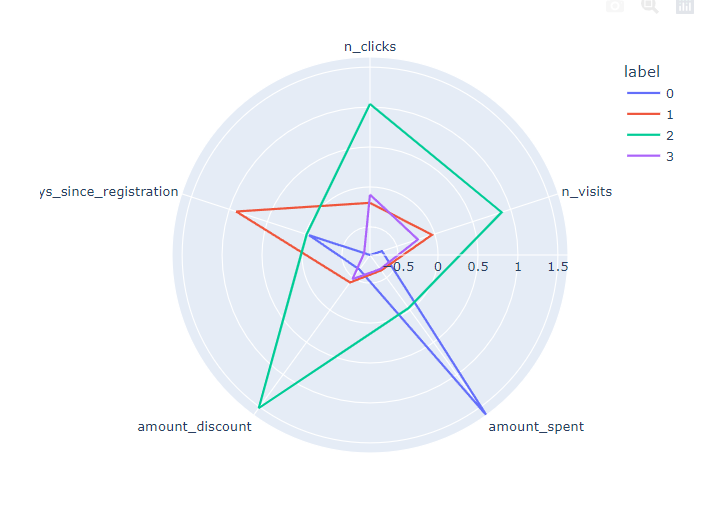

- label 0 : are those customers who knows what they want to purchase , and dont have much clicks and visits , but spending amount is the highest. 


- label 2 : these customers are those, who have received highest amount of discounts and also have spent lot of visits and number of clicks. THese customers seems to research a lot before purchasing. 


- label 3 :  are seems like new customers . who have recently registered , but their amount spent is yet low. can be potential customer for future. 




- label 1 : are those customers , who have registered on website since long, who have spent less amount , and recieved less amount of ddiscounts.

# Finding the best k for clusters : 

In [257]:
# Inertia = Within Cluster Sum of Squares

In [258]:
kmeans_per_k = [KMeans(n_clusters=k,
                       random_state=42).fit(X) for k in range(1,10)]

In [259]:
inertias = [model.inertia_ for model in kmeans_per_k]

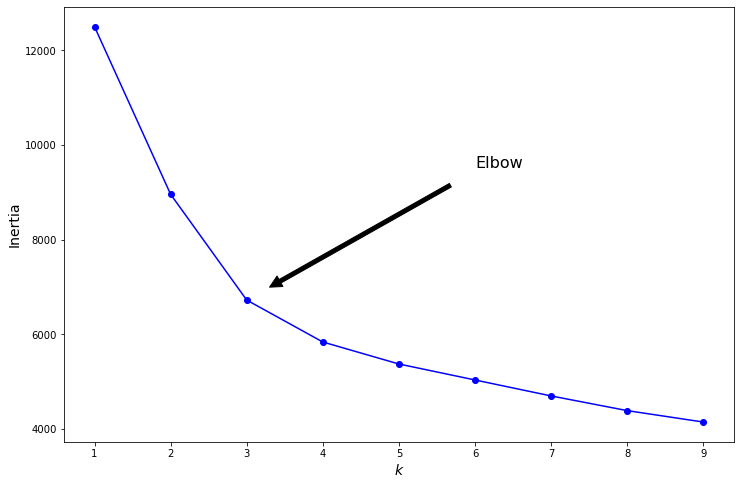

In [260]:
plt.figure(figsize=(12, 8))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.annotate('Elbow',
             xy=(3, inertias[2]),
             xytext=(0.55, 0.55),
             textcoords='figure fraction',
             fontsize=16,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
plt.show()

In [261]:
from sklearn.metrics import silhouette_score

In [262]:
silhouette_scores = [silhouette_score(X, model.labels_) for model in kmeans_per_k[1:]]


In [263]:
silhouette_scores

[0.30481708845423433,
 0.30642195669472405,
 0.24574421916683428,
 0.23396382452289044,
 0.21100284542853387,
 0.19626213351460037,
 0.1959457986866124,
 0.20128517005340374]

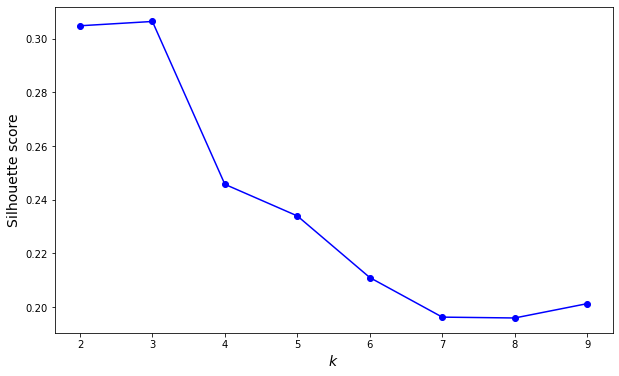

In [264]:
plt.figure(figsize=(10, 6))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.show()

    
        
       
        
                            b - a 
       Silhouette Score =  ----------
                            max(b,a)


        
        b = min(average distance from point Xi, to other cluster points)
        a = average within cluster distance for Xi
        
        Range of Silhouette Score is : -1 to +1
        

In [265]:
clusters_parallel = clusters.sample(500)

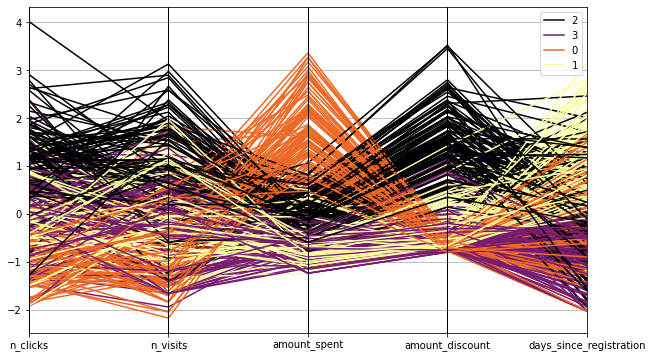

In [266]:
plt.figure(figsize=(10,6))
pd.plotting.parallel_coordinates(clusters_parallel, class_column='label', colormap = "inferno")
plt.show()


In [267]:
X

array([[-1.49525046, -0.75853514, -1.0546079 , -0.73280181,  0.32311781],
       [ 0.72069055, -1.24748762, -0.69029479, -0.78600001,  0.27267227],
       [ 0.59728463,  0.19363547, -0.24643087,  0.93586821,  0.46436533],
       ...,
       [-0.18070918,  0.42524454, -1.23783946, -0.79768267, -1.18015931],
       [-0.73871854, -1.60776839,  1.49508703, -0.6372668 , -0.90775339],
       [ 2.17473416,  0.73405663, -0.04325806,  1.38982891,  0.47445444]])

In [268]:
unscaled_data

,n_clicks,n_visits,amount_spent,amount_discount,days_since_registration
0,130,65,213.91,31.60,233
1,543,46,639.22,5.69,228
2,520,102,1157.40,844.32,247
3,702,83,1195.90,850.04,148
4,221,84,180.75,64.28,243
...,...,...,...,...,...
2495,804,120,502.64,373.41,363
2496,482,60,530.01,122.64,112
2497,375,111,0.00,0.00,84
2498,271,32,3190.50,78.13,111


In [270]:
from sklearn.cluster import AgglomerativeClustering

AggCl = AgglomerativeClustering(
    n_clusters=6,
    affinity='euclidean',
    connectivity=None,
    compute_full_tree='auto',
    linkage='ward',
    distance_threshold=None,
    compute_distances=False,
)


AggCl.fit(X)

clusters_Agg = pd.DataFrame(X, columns=df.columns)
clusters_Agg['label'] = AggCl.labels_




polar_Agg = clusters_Agg.groupby("label").mean().reset_index()
polar_Agg = pd.melt(polar_Agg, id_vars=["label"])
import plotly.express as px

fig = px.line_polar(polar_Agg,
                    r="value", 
                    theta="variable",
                    color="label", 
                    line_close=True,
                    height=500,
                    width= 600
                       )
fig.show()




In [55]:
# Linkage in AgglomerativeClustering

### The common type of linkages that can be formed between the two clusters are:

1. **Complete linkage**: It is the maximum distance between the two farthest points of different clusters.

2. **Single linkage**: It is the minimum distance between the two closest points of different clusters.

3. **Centroid linkage**: The distance between the centroids of the clusters is calculated.

4. **Ward’s distance/linkage**: The Ward’s distance between two clusters c1 and c2 is given as: 
    
    W(C1 + C2) = WCSS(C1+C2) - WCSS(C1) - WCSS(C2)

    where WCSS is the within-cluster sum of squares

In [272]:
from sklearn.cluster import KMeans

KMeans2 = KMeans(
    n_clusters=6,
    init='k-means++',
    n_init='warn',
    max_iter=1000,
    tol=0.0001,
    verbose=0,
    random_state=None,
    copy_x=True,
    algorithm='auto',
)


KMeans2.fit(X)

clusters_KMeans2 = pd.DataFrame(X, columns=df.columns)
clusters_KMeans2['label'] = KMeans2.labels_




polar_KM2 = clusters_KMeans2.groupby("label").mean().reset_index()
polar_KM2 = pd.melt(polar_KM2, id_vars=["label"])
import plotly.express as px

fig = px.line_polar(polar_KM2,
                    r="value", 
                    theta="variable",
                    color="label", 
                    line_close=True,
                    height=500,
                    width= 600
                       )
fig.show()




In [273]:
unscaled_data

,n_clicks,n_visits,amount_spent,amount_discount,days_since_registration
0,130,65,213.91,31.60,233
1,543,46,639.22,5.69,228
2,520,102,1157.40,844.32,247
3,702,83,1195.90,850.04,148
4,221,84,180.75,64.28,243
...,...,...,...,...,...
2495,804,120,502.64,373.41,363
2496,482,60,530.01,122.64,112
2497,375,111,0.00,0.00,84
2498,271,32,3190.50,78.13,111


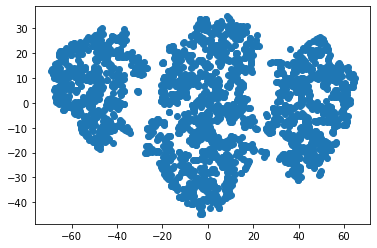

In [274]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# assume X is your high-dimensional data matrix
tsne = TSNE(n_components=2, random_state=0)
X_2d = tsne.fit_transform(X)

# plot the 2D visualization
plt.scatter(X_2d[:, 0], X_2d[:, 1])
plt.show()


In [275]:
clusters

,n_clicks,n_visits,amount_spent,amount_discount,days_since_registration,label
0,-1.495250,-0.758535,-1.054608,-0.732802,0.323118,1
1,0.720691,-1.247488,-0.690295,-0.786000,0.272672,1
2,0.597285,0.193635,-0.246431,0.935868,0.464365,2
3,1.573801,-0.295317,-0.213452,0.947612,-0.534456,2
4,-1.006992,-0.269583,-1.083012,-0.665704,0.424009,1
...,...,...,...,...,...,...
2495,2.121079,0.656854,-0.807287,-0.031000,1.634702,1
2496,0.393397,-0.887207,-0.783842,-0.545879,-0.897664,3
2497,-0.180709,0.425245,-1.237839,-0.797683,-1.180159,3
2498,-0.738719,-1.607768,1.495087,-0.637267,-0.907753,0


###  KMeans with k = 3 , after visualization , using t-SNE dimentionality reduction : 

In [277]:
from sklearn.cluster import KMeans
k = 3 
# from the visualization estimating total clusters can be 4 

kmeans = KMeans(n_clusters=k)
y_pred = kmeans.fit_predict(X)


clusters = pd.DataFrame(X, columns=df.columns)
clusters['label'] = kmeans.labels_
clusters

,n_clicks,n_visits,amount_spent,amount_discount,days_since_registration,label
0,-1.495250,-0.758535,-1.054608,-0.732802,0.323118,2
1,0.720691,-1.247488,-0.690295,-0.786000,0.272672,2
2,0.597285,0.193635,-0.246431,0.935868,0.464365,1
3,1.573801,-0.295317,-0.213452,0.947612,-0.534456,1
4,-1.006992,-0.269583,-1.083012,-0.665704,0.424009,2
...,...,...,...,...,...,...
2495,2.121079,0.656854,-0.807287,-0.031000,1.634702,1
2496,0.393397,-0.887207,-0.783842,-0.545879,-0.897664,2
2497,-0.180709,0.425245,-1.237839,-0.797683,-1.180159,2
2498,-0.738719,-1.607768,1.495087,-0.637267,-0.907753,0


In [278]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# assume X is your high-dimensional data matrix
tsne = TSNE(n_components=2, random_state=0)
X_2d = tsne.fit_transform(clusters.drop("label",axis = 1))

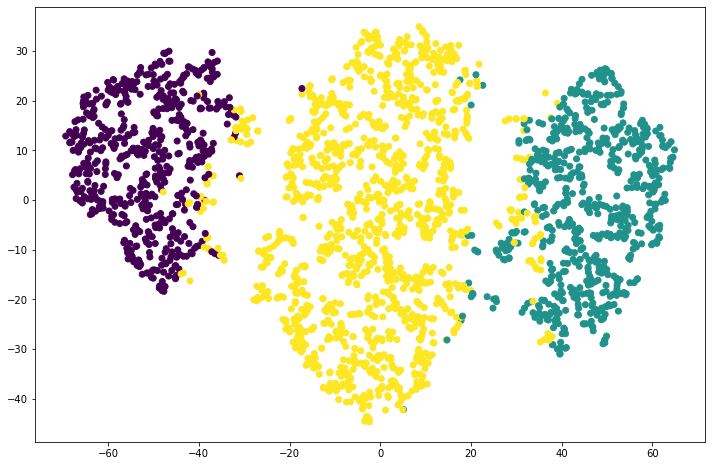

In [279]:

X_2d = pd.DataFrame(X_2d)
X_2d["label"] = clusters["label"]

plt.figure(figsize=(12,8))
plt.scatter(X_2d.iloc[:,0], X_2d.iloc[:,1], c = clusters["label"])
plt.show()

In [280]:


polar = clusters.groupby("label").mean().reset_index()
polar = pd.melt(polar, id_vars=["label"])
import plotly.express as px

fig = px.line_polar(polar,
                    r="value", 
                    theta="variable",
                    color="label", 
                    line_close=True,
                    height=500,
                    width= 600
                       )
fig.show()




## DBSCAN : 

#### Density based spatial clsutering of applications with Noise : 

- Density of Point P = number of points within the hypersphere centered at P with radius Epsilon 

In [315]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(
    eps=0.10,
    min_samples=6,
    metric='euclidean',
    metric_params=None,
    algorithm='auto',
    leaf_size=30,
    p=None,
    n_jobs=None,)

df = pd.read_csv('E-commerce.csv')
df = df.drop(["ID","profile_information"],axis=1)


X = df.copy()
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X)
X=scaler.transform(X)



 
dbscan.fit(X)

labels = dbscan.labels_
np.unique(labels)


clusters = pd.DataFrame(X, columns=df.columns)
clusters['label'] = dbscan.labels_



polar = clusters.groupby("label").mean().reset_index()
polar = pd.melt(polar, id_vars=["label"])
import plotly.express as px

fig = px.line_polar(polar,
                    r="value", 
                    theta="variable",
                    color="label", 
                    line_close=True,
                    height=500,
                    width= 600
                       )
fig.show()

import plotly.express as px

fig = px.scatter_3d(clusters,
                    x='n_clicks',
                    y='amount_spent', 
                    z='amount_discount',
                    color='label')
fig.update_traces(marker=dict(size=2,
                              line=dict(width=2,
                                        color='DarkSlateGrey')),
                  selector=dict(mode='markers'))
fig.show()


In [284]:
df.drop("ID",axis=1).columns

Index(['n_clicks', 'n_visits', 'amount_spent', 'amount_discount', 'days_since_registration', 'profile_information'], dtype='object')